In [2]:
import numpy as np
import pandas as pd
import yfinance as yf

import warnings
warnings.filterwarnings('ignore')

In [3]:
today = pd.Timestamp.today().strftime('%Y-%m-%d')
today

'2023-06-03'

In [4]:
two_years_ago = (pd.Timestamp.today() - pd.DateOffset(years=2)).strftime('%Y-%m-%d')
two_years_ago

'2021-06-03'

In [5]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Define the list of stock tickers
stock_tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'JPM']  # Example subset of stocks from S&P 500

# Fetch historical stock data
start_date = two_years_ago
end_date = today
stock_data = yf.download(stock_tickers, start=start_date, end=end_date)['Adj Close']
stock_data

[*********************100%***********************]  5 of 5 completed


,AAPL,AMZN,GOOGL,JPM,MSFT
Date,,,,,
2021-06-03,122.109062,159.350494,117.378998,156.805389,241.386612
2021-06-04,124.431839,160.311005,119.678497,157.060165,246.377213
2021-06-07,124.441734,159.900497,120.114998,156.324112,249.344070
2021-06-08,125.271996,163.205505,119.921997,155.701309,248.125916
2021-06-09,125.657471,164.057495,120.397003,153.757416,249.127945
...,...,...,...,...,...
2023-05-26,175.429993,120.110001,124.610001,136.940002,332.890015
2023-05-30,177.300003,121.660004,123.669998,137.460007,331.209991
2023-05-31,177.250000,120.580002,122.870003,135.710007,328.390015


In [6]:
# Calculate daily returns
stock_returns = stock_data.pct_change().dropna()
stock_returns

,AAPL,AMZN,GOOGL,JPM,MSFT
Date,,,,,
2021-06-04,0.019022,0.006028,0.019590,0.001625,0.020675
2021-06-07,0.000080,-0.002561,0.003647,-0.004686,0.012042
2021-06-08,0.006672,0.020669,-0.001607,-0.003984,-0.004885
2021-06-09,0.003077,0.005220,0.003961,-0.012485,0.004038
2021-06-10,-0.008023,0.020877,0.011292,-0.015589,0.014393
...,...,...,...,...,...
2023-05-26,0.014105,0.044435,0.009151,0.009361,0.021386
2023-05-30,0.010660,0.012905,-0.007544,0.003797,-0.005047
2023-05-31,-0.000282,-0.008877,-0.006469,-0.012731,-0.008514


In [7]:
# Number of stocks
num_stocks = len(stock_tickers)

# Define the number of simulated portfolios
num_portfolios = 10000

# Simulate portfolio weights
weights = np.random.random((num_portfolios, num_stocks))
weights /= np.sum(weights, axis=1)[:, np.newaxis]

# Calculate portfolio returns and volatility
portfolio_returns = np.dot(weights, stock_returns.mean().values)  # Use mean returns of individual stocks
portfolio_volatility = np.sqrt(np.diag(np.dot(weights, np.dot(stock_returns.cov().values, weights.T))))  # Use diagonal elements of covariance matrix


# Calculate Sharpe ratio
risk_free_rate = yf.Ticker('^TNX').history(period='1d').iloc[-1]['Close'] / 100.0 # Get risk-free rate (10-year US Treasury bond yield)
portfolio_sharpe_ratio = (portfolio_returns - risk_free_rate) / portfolio_volatility

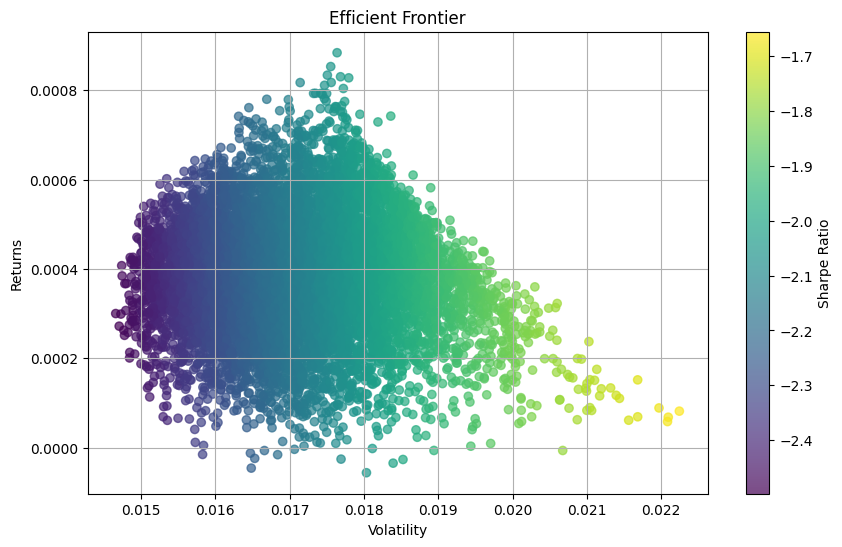

In [8]:
# Plot the efficient frontier
plt.figure(figsize=(10, 6))
plt.scatter(portfolio_volatility, portfolio_returns, c=portfolio_sharpe_ratio, cmap='viridis', alpha=0.7)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.title('Efficient Frontier')
plt.grid(True)
plt.show()

In [9]:
import numpy as np
import pandas as pd
import yfinance as yf
import plotly.graph_objects as go

# Define the list of stock tickers
stock_tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'JPM']  # Example subset of stocks from S&P 500

# Fetch historical stock data
start_date = '2019-01-01'
end_date = '2020-12-31'
stock_data = yf.download(stock_tickers, start=start_date, end=end_date)['Adj Close']

# Calculate daily returns
stock_returns = stock_data.pct_change().dropna()

# Number of stocks
num_stocks = len(stock_tickers)

# Define the number of simulated portfolios
num_portfolios = 10000

# Simulate portfolio weights
weights = np.random.random((num_portfolios, num_stocks))
weights /= np.sum(weights, axis=1)[:, np.newaxis]

# Calculate portfolio returns and volatility
portfolio_returns = np.dot(weights, stock_returns.mean().values)  # Use mean returns of individual stocks
portfolio_volatility = np.sqrt(np.diag(np.dot(weights, np.dot(stock_returns.cov().values, weights.T))))  # Use diagonal elements of covariance matrix

# Calculate Sharpe ratio
risk_free_rate = 0.05  # Risk-free rate assumed for Sharpe ratio calculation
portfolio_sharpe_ratio = (portfolio_returns - risk_free_rate) / portfolio_volatility

# Create a DataFrame to store the portfolio data
portfolio_df = pd.DataFrame({'Returns': portfolio_returns, 'Volatility': portfolio_volatility, 'Sharpe Ratio': portfolio_sharpe_ratio})

# Calculate individual stock returns and volatilities
stock_individual_returns = stock_returns.mean().values
stock_individual_volatilities = stock_returns.std().values

# Create a DataFrame for individual stock data
stock_df = pd.DataFrame({'Stock': stock_tickers, 'Returns': stock_individual_returns, 'Volatility': stock_individual_volatilities})

# Plot the efficient frontier
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=portfolio_volatility,
    y=portfolio_returns,
    mode='markers',
    marker=dict(
        size=8,
        color=portfolio_sharpe_ratio,
        colorscale='viridis',
        showscale=True,
        colorbar=dict(
            title='Sharpe Ratio'
        )
    ),
    name='Portfolios'
))
fig.add_trace(go.Scatter(
    x=stock_individual_volatilities,
    y=stock_individual_returns,
    mode='markers',
    marker=dict(
        size=10,
        color='red',
        symbol='cross'
    ),
    name='Stocks'
))
fig.update_layout(
    title='Efficient Frontier',
    xaxis=dict(title='Volatility'),
    yaxis=dict(title='Returns'),
    showlegend=True,
    hovermode='closest'
)
fig.show()


[*********************100%***********************]  5 of 5 completed


# Efficient Frontier


In [10]:
import numpy as np
import pandas as pd
import yfinance as yf
import plotly.graph_objects as go

# Define the list of stock tickers
stock_tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'JPM']  # Example subset of stocks from S&P 500

# Fetch historical stock data
start_date = '2013-01-01'
end_date = '2023-06-03'
stock_data = yf.download(stock_tickers, start=start_date, end=end_date)['Adj Close']

# Calculate daily returns
stock_returns = stock_data.pct_change().dropna()

# Number of stocks
num_stocks = len(stock_tickers)

# Define the number of simulated portfolios
num_portfolios = 1000

# Simulate portfolio weights
weights = np.random.random((num_portfolios, num_stocks))
weights /= np.sum(weights, axis=1)[:, np.newaxis]

# Calculate portfolio returns and volatility
portfolio_returns = np.dot(weights, stock_returns.mean().values)  # Use mean returns of individual stocks
portfolio_volatility = np.sqrt(np.diag(np.dot(weights, np.dot(stock_returns.cov().values, weights.T))))  # Use diagonal elements of covariance matrix

# Calculate Sharpe ratio
risk_free_rate = 0.05  # Risk-free rate assumed for Sharpe ratio calculation
portfolio_sharpe_ratio = (portfolio_returns - risk_free_rate) / portfolio_volatility

# Create a DataFrame to store the portfolio data
portfolio_df = pd.DataFrame({'Returns': portfolio_returns, 'Volatility': portfolio_volatility, 'Sharpe Ratio': portfolio_sharpe_ratio})

# Calculate individual stock returns and volatilities
stock_individual_returns = stock_returns.mean().values
stock_individual_volatilities = stock_returns.std().values

# Create a DataFrame for individual stock data
stock_df = pd.DataFrame({'Stock': stock_tickers, 'Returns': stock_individual_returns, 'Volatility': stock_individual_volatilities})

# Create traces for individual stocks
stock_traces = []
for stock in stock_df.iterrows():
    stock_trace = go.Scatter(
        x=[stock[1]['Volatility']],
        y=[stock[1]['Returns']],
        mode='markers',
        marker=dict(
            size=10,
            symbol='cross',
            color='red'
        ),
        name=stock[1]['Stock']
    )
    stock_traces.append(stock_trace)

# Create a trace for the efficient frontier
portfolio_trace = go.Scatter(
    x=portfolio_volatility,
    y=portfolio_returns,
    mode='markers',
    marker=dict(
        size=8,
        color=portfolio_sharpe_ratio,
        colorscale='viridis',
        showscale=True,
        colorbar=dict(
            title='Sharpe Ratio'
        )
    ),
    name='Portfolios',
    hovertemplate='Returns: %{y:.2%}<br>Volatility: %{x:.2%}<br>Sharpe Ratio: %{marker.color:.2f}'
)

# Combine the traces and create the layout
data = stock_traces + [portfolio_trace]
layout = go.Layout(
    title='Efficient Frontier',
    xaxis=dict(title='Volatility'),
    yaxis=dict(title='Returns'),
    showlegend=True,
    hovermode='closest'
)

# Create the figure and show the plot
fig = go.Figure(data=data, layout=layout)
fig.show()



[*********************100%***********************]  5 of 5 completed
